# Reto 02 M2: Filtrado de StopWords

In [1]:
# Asignación de StopWords predefinidas para idioma Español
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kuautli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
listdir(path)

['El_señor_de_los_anillos.txt',
 'Los_Juegos_del_hambre.txt',
 'Juego_de_tronos.txt',
 'Harry_Potter.txt',
 'Crepusculo.txt']

In [6]:
# Creamos un diccionario con el formato
# {Veces_que_aparece_la_palabra: [Palabra1, Palbra2, Palabra3, etc..]}
from os import listdir
Palabras = []
Textos = []

path = "/home/kuautli/Documents/Python-Projects/apuntes-nlp/data/Textos_Stopwords/"

for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    with open(path + File, encoding="latin-1") as Text:
        # LEER el texto y pasar todo a minúsculas y reemplazar signos de puntuación 
        texto = Text.read().lower()
        texto = "".join(char for char in texto if (char.isalnum() or char == " "))
        Textos.append(texto)
        # Agregamos al diccionario de palabras, solo las que no sean StopWords
        for palabra in texto.split():
            if(palabra not in stop_words):
                Palabras.append(palabra)
    
# Crear el diccionario con las frecuencias como claves y listas de palabras 
# correspondientes a cada frecuencia como valores
Palabras_unicas = {}
for unica in set(Palabras):
    Frec = Palabras.count(unica)
    # Preguntar si existe el elemento en el diccionario y si no, agregarlo
    if(Palabras_unicas.get(Frec) == None):
        Palabras_unicas.get(Frec, [unica])
    else:
        Palabras_unicas[Frec].append(unica)
print(Palabras_unicas)

{}


In [13]:
Palabras

['rey',
 'inmóvil',
 'montado',
 'crinblanca',
 'contemplaba',
 'agonía',
 'minas',
 'tirith',
 'si',
 'angustia',
 'terror',
 'paralizado',
 'parecía',
 'encogido',
 'acobardado',
 'pronto',
 'edad',
 'merry',
 'sentía',
 'abrumado',
 'peso',
 'insoportable',
 'horror',
 'duda',
 'corazón',
 'latía',
 'lentamente',
 'tiempo',
 'parecía',
 'haberse',
 'detenido',
 'incertidumbre',
 'llegado',
 'demasiado',
 'tarde',
 'demasiado',
 'tarde',
 'peor',
 'nunca',
 'acaso',
 'théoden',
 'apunto',
 'ceder',
 'dejar',
 'caer',
 'vieja',
 'cabeza',
 'dar',
 'media',
 'vuelta',
 'huir',
 'furtivamente',
 'esconderse',
 'colinas',
 'mismo',
 'instante',
 'resplandor',
 'si',
 'rayo',
 'salido',
 'entrañas',
 'mismas',
 'tierra',
 'bajo',
 'ciudad',
 'segundo',
 'vieron',
 'forma',
 'incandescente',
 'enceguecedora',
 'lejana',
 'blanco',
 'negro',
 'torre',
 'mas',
 'alta',
 'resplandeció',
 'aguja',
 'rutilante',
 'momento',
 'después',
 'volvió',
 'cerrarse',
 'oscuridad',
 'trueno',
 'ensordec

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(-0.06, 0, '−0.06'),
  Text(-0.039999999999999994, 0, '−0.04'),
  Text(-0.019999999999999997, 0, '−0.02'),
  Text(0.0, 0, '0.00'),
  Text(0.020000000000000004, 0, '0.02'),
  Text(0.04000000000000001, 0, '0.04'),
  Text(0.06, 0, '0.06')])

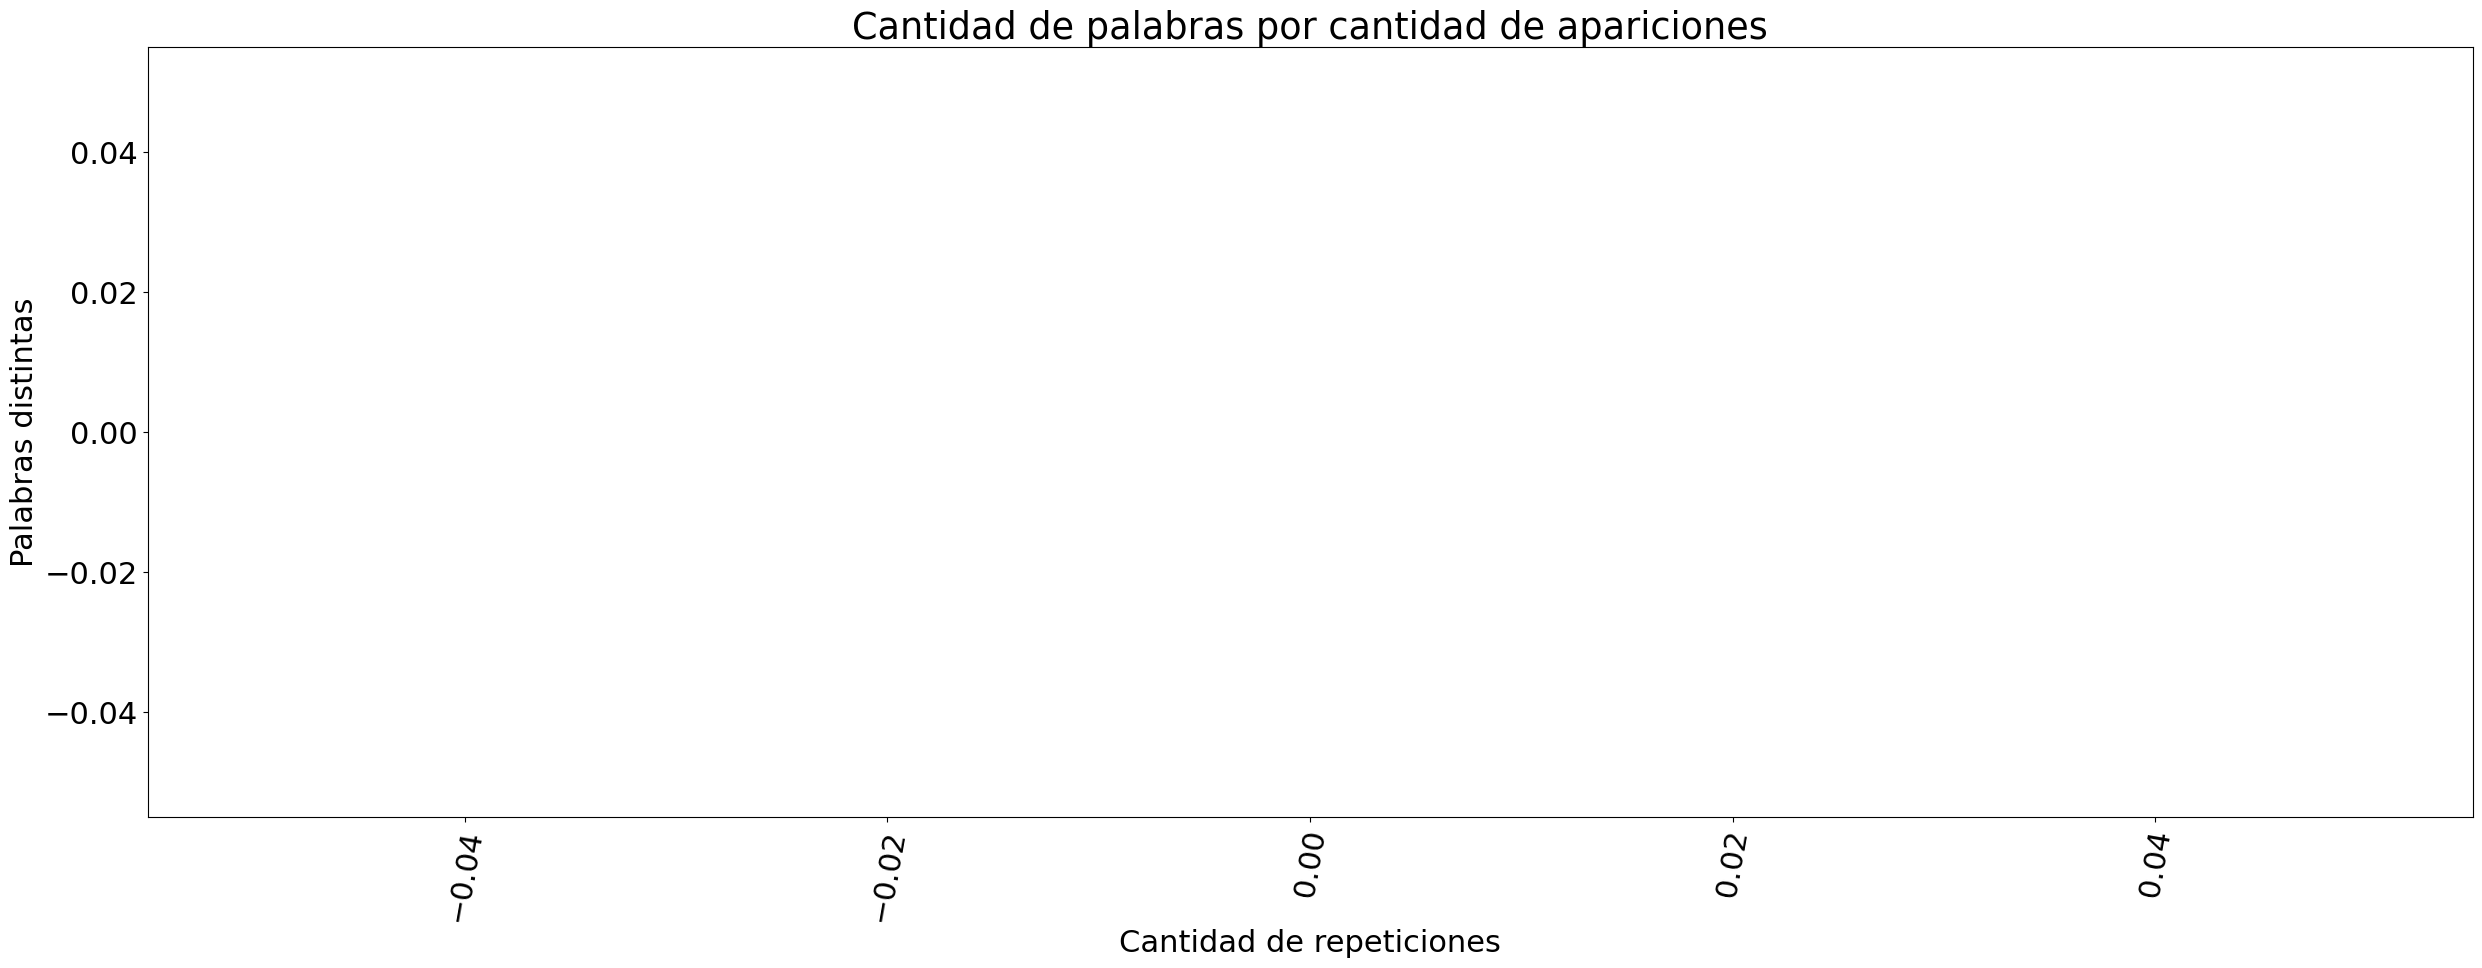

In [12]:
# Ploteo de la gráfica de palabras para cada frecuencia de repetición
# Declarar la librería para plotear y los parámetros de la gráfica
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,10))

# Extraer la cantidad de palabras de cada categoría
Frecuencias = []
for Lista in Palabras_unicas.values():
    Frecuencias.append(len(Lista))

# Parámetros de ploteo
plt.bar(Palabras_unicas.keys(), Frecuencias, color=['cornflowerblue', 'lightblue', 'steelblue'])  
plt.ylabel('Palabras distintas')
plt.xlabel('Cantidad de repeticiones')
plt.title('Cantidad de palabras por cantidad de apariciones')
plt.xticks(rotation=80)

In [ ]:
# Impresión de las palabras que corresponden a cada frecuencia:
# (Se suma +1 porque el primer índice debe ser 1 y no 0)
for x in range(len(_____.keys())):
    print("\nPalabras que se repiten " + str(x+1) + " veces:")
    if(Palabras_unicas.get(x+1) != None):
        print(set(Palabras_unicas[x+1]))

In [ ]:
# Agregar palabras adicionales (Personalizadas) al diccionario de StopWords

print("Cantidad de Stopwords:", len(stop_words))

nuevas_StopWords = ['si','no', 'hola', 'adios', 'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde']
stop_words.extend(nuevas_StopWords)

print("Cantidad nueva de Stopwords:", len(_____))

In [ ]:
# Método que toma un texto y regresa el texto SIN stopwords
def filtro_stopwords(Texto, stopwords):
    texto_final = ""
    for word in Texto.split():
        if _____.lower() not in _____:
            texto_final += _____ + " "
    return texto_final

In [ ]:
# Imprimirmos todos los textos sin StopWords
i = 1
for texto in Textos:
    nuevo_texto = filtro_stopwords(_____, _____)
    print("Texto" + str(i)+ ":")
    print(nuevo_texto, "\n")
    i += 1